# Heart Disease Prediction with Logistic Regression

In this project, we'll use a dataset to predict the risk of heart disease based on various health features such as age, blood pressure, cholesterol, and more. The target variable is "condition," where:
- **0** indicates no heart disease
- **1** indicates the presence of heart disease

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("HeartDiseaseLogReg/heart_cleveland_upload.csv")

# Display the first few rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


| **Feature**       | **Description**                                                                                                                                      |
|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|
| **age**           | Represents the **age** of the individual in years.                                                                                                  |
| **sex**           | Represents the **sex** of the individual. <br> **1.0**: Male <br> **0.0**: Female                                                                  |
| **cp**            | Represents the **chest pain type**. <br> **0.0**: Typical angina <br> **1.0**: Atypical angina <br> **2.0**: Non-anginal pain <br> **3.0**: Asymptomatic |
| **trestbps**      | Represents the **resting blood pressure** (mmHg).                                                                                                   |
| **chol**          | Represents the **serum cholesterol** level (mg/dl).                                                                                                |
| **fbs**           | Represents **fasting blood sugar** level. <br> **1.0**: Fasting blood sugar > 120 mg/dl <br> **0.0**: Fasting blood sugar <= 120 mg/dl               |
| **restecg**       | Represents the **resting electrocardiographic results**. <br> **0.0**: Normal <br> **1.0**: ST-T wave abnormality <br> **2.0**: Left ventricular hypertrophy |
| **thalach**       | Represents the **maximum heart rate achieved** during exercise.                                                                                   |
| **exang**         | Represents whether the individual experienced **exercise-induced angina**. <br> **1.0**: Yes <br> **0.0**: No                                     |
| **oldpeak**       | Represents the **depression of the ST segment** induced by exercise relative to rest (in mm).                                                      |
| **slope**         | Represents the **slope of the peak exercise ST segment**. <br> **0.0**: Upsloping <br> **1.0**: Flat <br> **2.0**: Downsloping                     |
| **ca**            | Represents the number of **major vessels colored by fluoroscopy** (angiogram) that have blockages. <br> Values range from 0 to 4.                    |
| **thal**          | Represents the individual's **thalassemia** status. <br> **0.0**: Normal <br> **1.0**: Fixed defect <br> **2.0**: Reversible defect                   |
| **condition**     | Represents whether the individual has **heart disease**. <br> **0.0**: No heart disease <br> **1.0**: Heart disease present                        |


## Data Exploration & Understanding

We now explore the dataset to understand its structure. We'll check for missing values and get a summary of the data types. We now explore the dataset to understand its structure. We'll check for missing values and get a summary of the data types. Then we visualize the dataset using a histogram


In [ ]:
# Shape of the dataset (rows, columns)
print("Dataset shape:", df.shape)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# View basic info: data types, non-null counts
print("\nData types and nulls:")
df.info()


In [ ]:
# Count the number of 0s and 1s in the target
print("\nTarget class distribution:")
print(df["condition"].value_counts())



Target class distribution:
condition
0    160
1    137
Name: count, dtype: int64


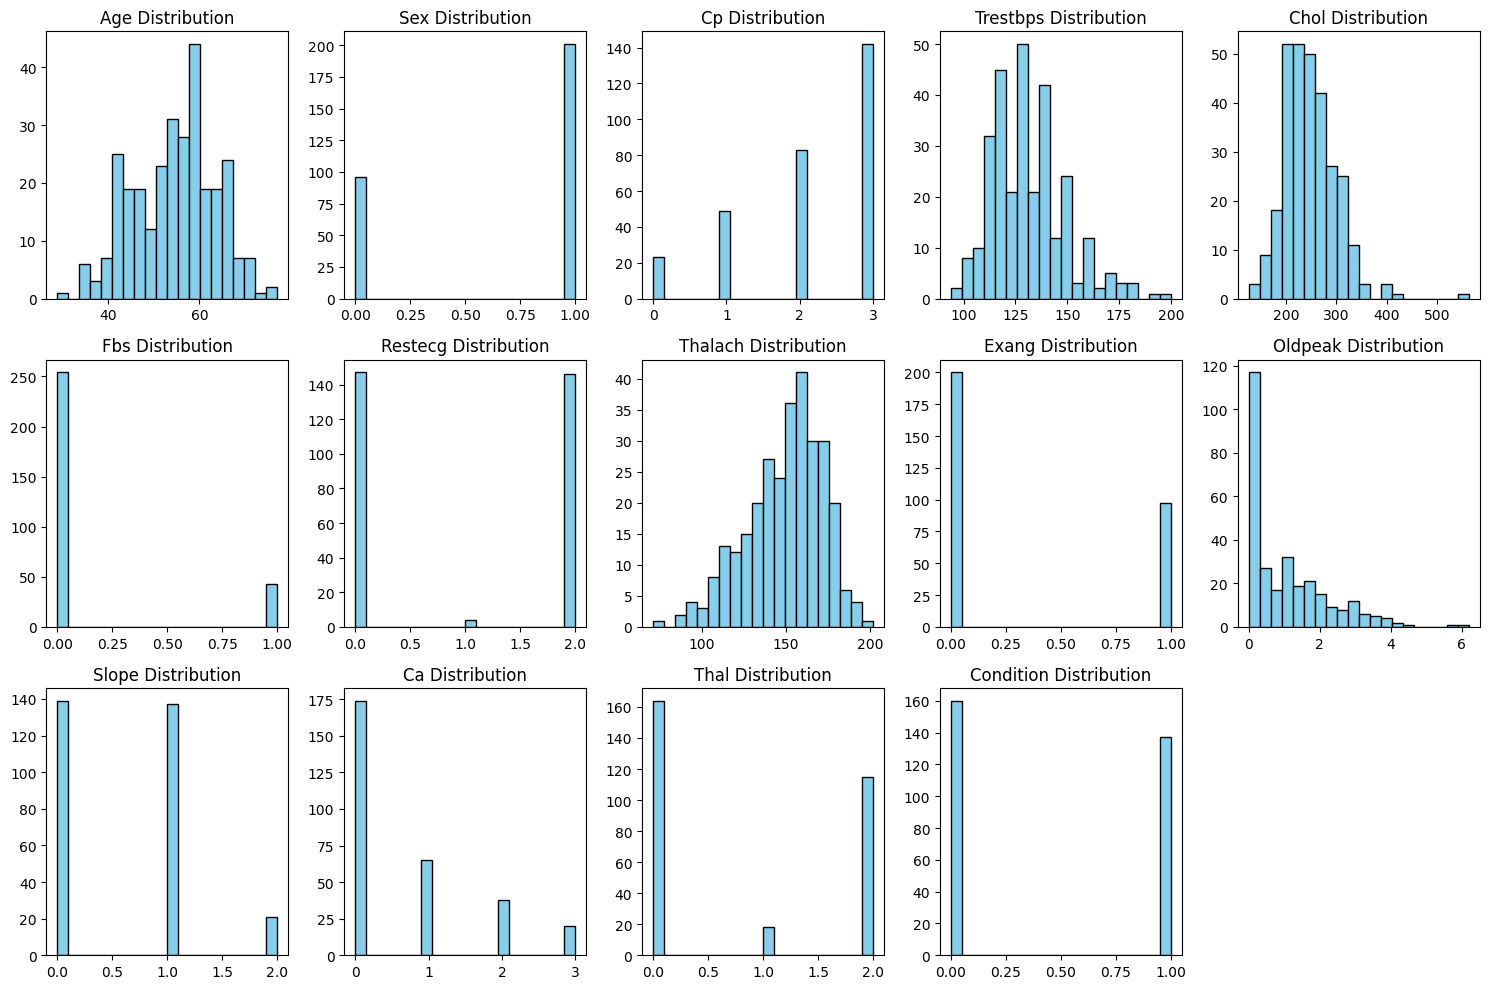

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size for all plots
plt.figure(figsize=(15, 10))

# Loop through all columns and plot a histogram for each
for i, column in enumerate(df.columns):
    plt.subplot(3, 5, i + 1)  # 3 rows, 5 columns for plotting
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')  # Simple histogram
    plt.title(f'{column.capitalize()} Distribution')
    plt.tight_layout()

# Show the plots
plt.show()
# Save the plot as a PNG image
plt.savefig('HeartDiseaseLogReg/feature_histograms.png')

## Data Preprocessing

In [ ]:
# Separate the features (X) and target (y)
X = df.drop("condition", axis=1)  # All columns except 'condition'
y = df["condition"]  # The target column

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)


In [ ]:
print(X_scaled)

[[ 1.60030243  0.69109474 -2.24062879 ...  0.6437811   0.34482438
  -0.87429153]
 [ 1.60030243 -1.44697961 -2.24062879 ... -0.97658319  1.41162482
  -0.87429153]
 [ 1.26824154 -1.44697961 -2.24062879 ...  2.26414539 -0.72197605
  -0.87429153]
 ...
 [-2.16305433  0.69109474  0.87388018 ...  0.6437811  -0.72197605
   1.21977769]
 [-2.16305433 -1.44697961  0.87388018 ... -0.97658319 -0.72197605
  -0.87429153]
 [-2.16305433  0.69109474  0.87388018 ... -0.97658319 -0.72197605
   1.21977769]]


## Split the Data into Training and Test Sets, and Train the Logistic Regression Model
train_test_split() splits your dataset into random subsets
Setting random_state=42 (or any fixed integer) makes sure that every time you run the code, the same split is generated.
Why 42? reference from The Hitchhiker's Guide to the Galaxy — "42 is the answer to life, the universe, and everything", any integer works

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
print(f"The dimension of the entire dataset without the condition result is {X_scaled.shape}")
print(f"The dimension of the training dataset is {X_train.shape}")
print(f"The dimension of the testing dataset is {X_test.shape}")

The dimension of the entire dataset without the condition result is (297, 13)
The dimension of the training dataset is (237, 13)
The dimension of the testing dataset is (60, 13)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)  # Increase iterations if convergence warnings

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## Evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix (True Positives, False Positives, etc.)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Detailed classification report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7333

Confusion Matrix:
[[23  9]
 [ 7 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [ ]:
from sklearn.metrics import confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
